### Paquetes, dataset y TF-idf

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import xml.etree.ElementTree as et

dfTOTAL = pd.read_csv("dfTotal.csv")
dfTOTAL = dfTOTAL.iloc[:, 1:]
doc = np.array(dfTOTAL)
docs = dfTOTAL['Headline'].tolist()

cv = CountVectorizer().fit(docs)
matrix_contador=cv.fit_transform(docs) #recordar que es una matriz
tfidf_transf = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transf.fit(matrix_contador)
df_idf = pd.DataFrame(tfidf_transf.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"]) 

tf_idf_matrix = tfidf_transf.transform(matrix_contador)

X = tf_idf_matrix  
y = dfTOTAL["Valence"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

### Nearest Neighbors

In [2]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
#print(classification_report(y_test, y_pred))
print(f'Precisión del modelo: {accuracy:.2f}')

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo:", mse)

Precisión del modelo: 0.03
MSE del modelo: 2809.6433333333334


### Naive Bayes 

In [3]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mseNB = mean_squared_error(y_test, y_pred)
mseNB

3350.2533333333336

### Gradient Boost 

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

reg = GradientBoostingRegressor(random_state=55)
reg.fit(X_train, y_train)
GradientBoostingRegressor(random_state=55)
GradientBoostingRegressor(random_state=55)

reg.score(X_test, y_test)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 2072.0272


### Gaussian Process Falló

## Simulaciones de los métodos de regresión

In [23]:
prom = []
dev_stand = []

### Nearest Neighbors 

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
iter = 10000

accuracy_list = []
mse_list = []

for i in range(1,(iter+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    neigh = KNeighborsRegressor(n_neighbors=1)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    
    #accuracy = accuracy_score(y_test, y_pred)
    #accuracy_list.append(accuracy)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    



In [24]:
Nnmean = np.mean(mse_list)
Nnstd = np.std(mse_list)

prom.append(Nnmean)
dev_stand.append(Nnstd)

### Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB

accuracy_listNB = []
mse_listNB = []
iter = 1000

for i in range(1,(iter+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    naive = MultinomialNB()
    naive.fit(X_train, y_train)
    y_pred = naive.predict(X_test)

    mseNB = mean_squared_error(y_test, y_pred)
    mse_listNB.append(mseNB)
    

In [25]:
NBprom = np.mean(mse_listNB)
NBstd = np.std(mse_listNB)

prom.append(NBprom)
dev_stand.append(NBstd)

### Gradient Boost

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

#reg.score(X_test, y_test)
accuracy_listGB = []
mse_listGB = []
iter = 100

for i in range(1,(iter+1)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    reg = GradientBoostingRegressor(random_state=i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    mseGB = mean_squared_error(y_test, y_pred)
    mse_listGB.append(mseGB)
    

In [26]:
GBprom = np.mean(mse_listGB)
GBstd = np.std(mse_listGB)

prom.append(GBprom)
dev_stand.append(GBstd)

print(len(prom))

3


#### Gráfico MSE y Desviación Estandar 

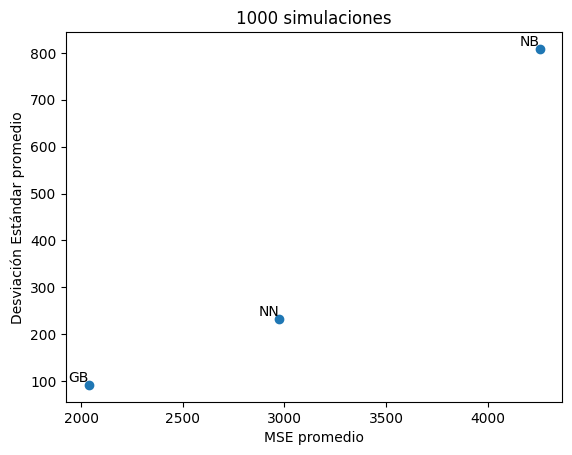

In [28]:
import matplotlib.pyplot as plt

nombres = ['NN', 'NB', 'GB']
plt.scatter(prom, dev_stand)

for i, nombre in enumerate(nombres):
    plt.text(prom[i], dev_stand[i], nombre, fontsize=10, ha='right', va='bottom')

plt.xlabel('MSE promedio')
plt.ylabel('Desviación Estándar promedio')
plt.title('1000 simulaciones')

plt.show()